# получить диапазон наиболее часто встречающихся значений в выборке

Ядерная оценка плотности (Kernel Density Estimation, KDE). Это позволяет оценить плотность распределения данных и найти наиболее плотные области.

Интервал с наибольшей плотностью: (2.53965285485228, 7.721759484825241)


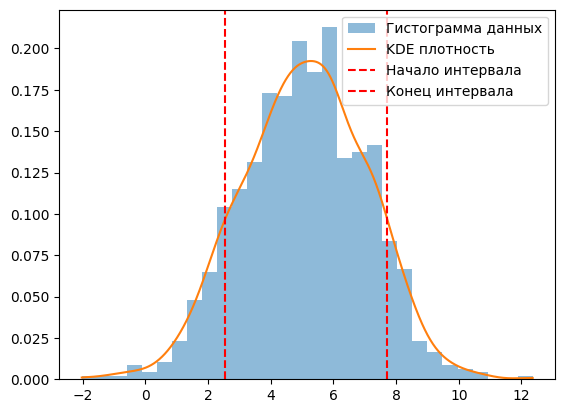

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Создаем выборку данных (пример, нормальное распределение)
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
data = np.random.normal(loc=5, scale=2, size=1000)

# Оценка плотности с помощью KDE
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html
kde = stats.gaussian_kde(data)

# Создаем массив значений для оценки плотности
x_vals = np.linspace(min(data), max(data), 1000)
density = kde(x_vals)

# Находим индексы, где плотность максимальна
max_density_idx = np.argmax(density)
max_density_value = x_vals[max_density_idx]

# Определяем интервал вокруг максимальной плотности
# Например, берем интервал, где плотность составляет более 50% от максимальной
threshold = 0.5 * max(density)
interval_indices = np.where(density > threshold)[0]
interval = (x_vals[interval_indices[0]], x_vals[interval_indices[-1]])

# Выводим результат
print("Интервал с наибольшей плотностью:", interval)

# Визуализация данных и плотности
plt.hist(data, bins=30, density=True, alpha=0.5, label='Гистограмма данных')
plt.plot(x_vals, density, label='KDE плотность')
plt.axvline(interval[0], color='r', linestyle='--', label='Начало интервала')
plt.axvline(interval[1], color='r', linestyle='--', label='Конец интервала')
plt.legend()
plt.show()
